# Applications of Differential Equations with Python

Differential equations are essential tools for modeling and understanding change in real-world systems across physics, engineering, and economics. In this tutorial, we'll explore how to formulate, solve, and visualize differential equations for practical applications using Python.

---

## 1. Physics: Simple Harmonic Oscillator (Mass-Spring System)

### **Model**

A mass $ m $ attached to a spring with spring constant $ k $:

$$
m\frac{d^2x}{dt^2} + kx = 0
$$

Let $ m = 1 $ kg, $ k = 4 $ N/m. The equation simplifies to:

$$
\frac{d^2x}{dt^2} + 4x = 0
$$

### **Python Solution**

Matplotlib is building the font cache; this may take a moment.


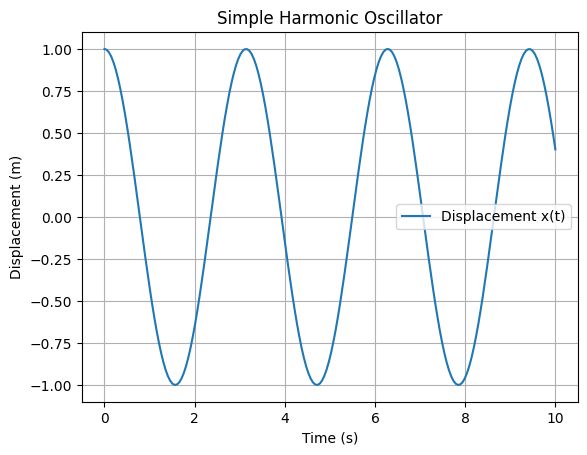

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sho(t, y):
    # y[0] = x, y[1] = dx/dt
    return [y[1], -4*y[0]]

t_span = (0, 10)
y0 = [1.0, 0.0]  # Initial position x=1, velocity dx/dt=0
t_eval = np.linspace(*t_span, 200)
sol = solve_ivp(sho, t_span, y0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='Displacement x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

## 2. Engineering: RC Circuit (First-Order Linear ODE)

### **Model**

A resistor $ R $ and capacitor $ C $ in series with voltage source $ V $:

$$
RC \frac{dV_C}{dt} + V_C = V
$$

Let $ R = 1\,\Omega $, $ C = 1\,\mathrm{F} $, $ V = 1\,\mathrm{V} $:

$$
\frac{dV_C}{dt} + V_C = 1
$$

### **Python Solution**

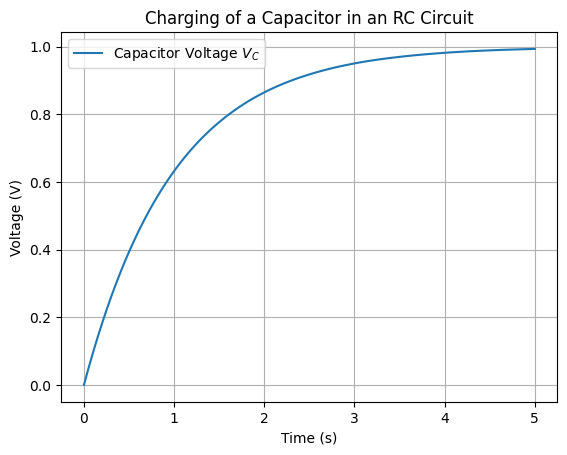

In [2]:
def rc_circuit(t, vc):
    return 1 - vc  # dV_C/dt

t_span = (0, 5)
vc0 = [0]  # Initial capacitor voltage
t_eval = np.linspace(*t_span, 100)
sol = solve_ivp(rc_circuit, t_span, vc0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='Capacitor Voltage $V_C$')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Charging of a Capacitor in an RC Circuit')
plt.grid(True)
plt.legend()
plt.show()

## 3. Economics: Logistic Growth Model (Population with Carrying Capacity)

### **Model**

Population growth with limit (carrying capacity $ K $):

$$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$

Let $ r = 0.5 $, $ K = 100 $, $ P(0) = 10 $:

### **Python Solution**

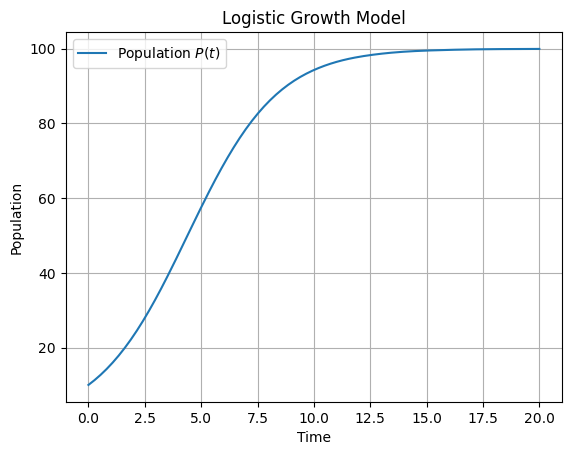

In [3]:
def logistic(t, P, r=0.5, K=100):
    return r * P * (1 - P / K)

t_span = (0, 20)
P0 = [10]
t_eval = np.linspace(*t_span, 150)
sol = solve_ivp(logistic, t_span, P0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='Population $P(t)$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth Model')
plt.grid(True)
plt.legend()
plt.show()

## 4. Additional Challenge: Coupled Oscillators (Physics/Engineering)

Two coupled masses:

$$
\begin{cases}
m_1 \frac{d^2x_1}{dt^2} = -k_1 x_1 + k_2 (x_2 - x_1) \\
m_2 \frac{d^2x_2}{dt^2} = -k_2 (x_2 - x_1)
\end{cases}
$$

Set $ m_1 = m_2 = 1 $, $ k_1 = k_2 = 1 $:

### **Python Solution**

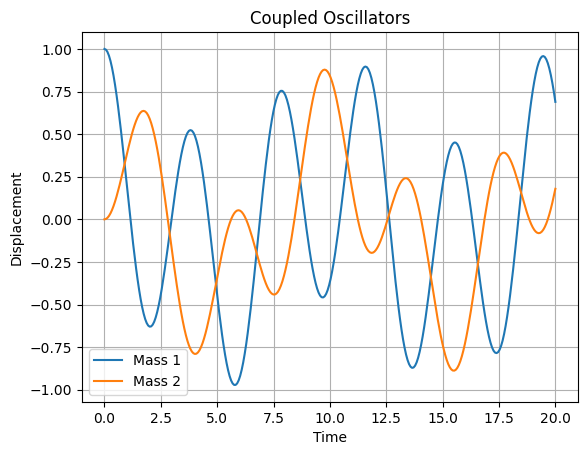

In [4]:
def coupled_oscillators(t, y):
    # y = [x1, v1, x2, v2]
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = -x1 + (x2 - x1)
    dx2dt = v2
    dv2dt = -(x2 - x1)
    return [dx1dt, dv1dt, dx2dt, dv2dt]

t_span = (0, 20)
y0 = [1.0, 0.0, 0.0, 0.0]  # Initial: x1=1, v1=0, x2=0, v2=0
t_eval = np.linspace(*t_span, 300)
sol = solve_ivp(coupled_oscillators, t_span, y0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='Mass 1')
plt.plot(sol.t, sol.y[2], label='Mass 2')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Coupled Oscillators')
plt.legend()
plt.grid(True)
plt.show()

---

## 5. Summary

- **Physics:** Differential equations model motion (oscillators, projectiles), heat, and waves.
- **Engineering:** Electrical circuits, control systems, and mechanical vibrations use ODEs.
- **Economics:** Population growth, investment models, and more.
- **Python** (with `scipy.integrate.solve_ivp` and `matplotlib`) allows you to solve and visualize these models efficiently.

Explore and adapt these templates for your own real-world problems!

---

# [Differential Equations Context](./README.md)